- <u> ***Importing libraries*** </u>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

- <u> ***Importing csv*** </u>

In [2]:
Amazon_devices = pd.read_csv("Amazon_devices.csv")
Amazon_devices

,date,number,name,rating,n_reviews,price
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,"512,797",$39.99
1,2021-02-01,2,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,"328,652",$24.99
2,2021-02-01,3,Echo Show 5 -- Smart display with Alexa – stay...,4.6,"298,030",$44.99
3,2021-02-01,4,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,"138,241",$44.99
4,2021-02-01,5,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,"62,702",$39.00
...,...,...,...,...,...,...
18095,2021-07-31,96,Tile Slim (2020) 1-pack - Slim & Sleek Bluetoo...,4.6,"25,512",$28.73
18096,2021-07-31,97,"Blink Outdoor - wireless, weather-resistant HD...",4.4,"60,859",$99.99
18097,2021-07-31,98,EVISTR 16GB Digital Voice Recorder Voice Activ...,4.4,"12,196",$39.99
18098,2021-07-31,99,"Echo (4th Gen) | With premium sound, smart hom...",4.7,"71,566",$69.99


In [37]:
Amazon_devices.dtypes

date         datetime64[ns]
number                int64
name                 object
rating              float64
n_reviews             int64
price               float64
month                 int64
dtype: object

- <u> ***Cleaning and manipulating*** </u>

In [3]:
#Removing the $ symbol to allow easy data type converstion.
Amazon_devices['price'] = Amazon_devices['price'].str.replace('$', '', regex = True)
Amazon_devices['price']

0        39.99
1        24.99
2        44.99
3        44.99
4        39.00
         ...  
18095    28.73
18096    99.99
18097    39.99
18098    69.99
18099    30.99
Name: price, Length: 18100, dtype: object

In [4]:
#Converting to numeric values
Amazon_devices['price'] = pd.to_numeric(Amazon_devices['price'], errors='coerce')

In [58]:
#checking for null values
Amazon_devices[Amazon_devices['price'].isnull()]

,date,number,name,rating,n_reviews,price,month


In [6]:
#Filling null values
Amazon_devices['price'] = Amazon_devices['price'].fillna(0)

In [7]:
Amazon_devices['price']

0        39.99
1        24.99
2        44.99
3        44.99
4        39.00
         ...  
18095    28.73
18096    99.99
18097    39.99
18098    69.99
18099    30.99
Name: price, Length: 18100, dtype: float64

In [8]:
#Changing the price column to float
Amazon_devices['price'] = Amazon_devices['price'].astype(float)

In [9]:
#Checking for any remaining null values
Amazon_devices['price'].isnull().sum()

0

In [10]:
#Removing the comma to allow easier conversion 
Amazon_devices['n_reviews'] = Amazon_devices['n_reviews'].str.replace(',', '' , regex = True)

In [11]:
Amazon_devices['n_reviews']

0        512797
1        328652
2        298030
3        138241
4         62702
          ...  
18095     25512
18096     60859
18097     12196
18098     71566
18099      9157
Name: n_reviews, Length: 18100, dtype: object

In [12]:
#Replacing string values to 0 allow conversion of data type 
Amazon_devices['n_reviews'] = Amazon_devices['n_reviews'].replace('No customer reviews yet', 0)

In [13]:
#Confirming replacement
Amazon_devices[Amazon_devices['n_reviews'] == 0]

,date,number,name,rating,n_reviews,price
16,2021-02-01,17,All-new Echo Show 10 (3rd Gen) | HD smart disp...,Not available,0,249.99
128,2021-02-02,29,All-new Echo Show 10 (3rd Gen) | HD smart disp...,Not available,0,249.99
232,2021-02-03,33,All-new Echo Show 10 (3rd Gen) | HD smart disp...,Not available,0,249.99
334,2021-02-04,35,All-new Echo Show 10 (3rd Gen) | HD smart disp...,Not available,0,249.99
537,2021-02-06,38,"Binoculars 20x50, HD Professional/Waterproof B...",Not available,0,0.00
...,...,...,...,...,...,...
17858,2021-07-29,59,Mini Spy Camera - 1080p Hidden Camera With Aud...,Not available,0,49.99
17929,2021-07-30,30,Mini Spy Camera - 1080p Hidden Camera With Aud...,Not available,0,49.99
17947,2021-07-30,48,Echo Dot (4th Gen) Limited Edition | Diane von...,Not available,0,59.99
18032,2021-07-31,33,Mini Spy Camera - 1080p Hidden Camera With Aud...,Not available,0,49.99


In [14]:
#Converting 'n_reviews column' from object to integer
Amazon_devices['n_reviews'] = Amazon_devices['n_reviews'].astype('int64')

In [15]:
#Confirming if there's any null values remaining 
Amazon_devices.isnull().sum()

date         0
number       0
name         0
rating       0
n_reviews    0
price        0
dtype: int64

In [16]:
# Converting the remaining string values to 0 
Amazon_devices['rating'] = Amazon_devices['rating'].replace('Not available', 0)

In [17]:
#Converting the 'rating' column to a float due to decimal points
Amazon_devices['rating'] = Amazon_devices['rating'].astype(float)

In [18]:
#Confirming if any strings are remaining
Amazon_devices['rating'].isnull().sum()

0

In [19]:
#Converting the date column from object to date type 
Amazon_devices['date'] = pd.to_datetime(Amazon_devices['date'])

In [20]:
#Checking the datatypes of all columns 
Amazon_devices.dtypes

date         datetime64[ns]
number                int64
name                 object
rating              float64
n_reviews             int64
price               float64
dtype: object

- <u> ***Analysing the dataset*** </u>

In [60]:
#Checking what are the most expensive products
expensive_proucts = Amazon_devices.groupby('name')['price'].sum().sort_values(ascending = False)
expensive_proucts

name
Blink Outdoor - wireless, weather-resistant HD security camera, two-year battery life, motion detection, set up in…         45182.11
2020 Apple iPad (10.2-inch, Wi-Fi, 128GB) - Space Gray (8th Generation)                                                     32783.68
Acer Aspire 5 Slim Laptop, 15.6 inches Full HD IPS Display, AMD Ryzen 3 3200U, Vega 3 Graphics, 4GB DDR4, 128GB SSD…        27833.44
Fitbit Versa 2 Health and Fitness Smartwatch with Heart Rate, Music, Alexa Built-In, Sleep and Swim Tracking, Black…        27705.07
Ring Stick Up Cam Battery HD security camera with custom privacy controls, Simple setup, Works with Alexa - Black           26926.98
                                                                                                                              ...   
Victure 1080P FHD Baby Monitor Pet Camera 2.4G Wireless Indoor Home Security Camera with Two-Way Audio Motion Detection…        0.00
andfive Smart Watch, Fitness Tracker for Women, IP68 Waterproof 

In [22]:
Amazon_devices['month'] = Amazon_devices['date'].dt.month
Amazon_devices.head(1)

,date,number,name,rating,n_reviews,price,month
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,512797,39.99,2


In [23]:
exp_products_month = Amazon_devices.groupby(['month', 'name'])['price'].sum().sort_values(ascending = False)
exp_products_month

month  name                                                                                                                 
6      Blink Outdoor - wireless, weather-resistant HD security camera, two-year battery life, motion detection, set up in…      14834.61
7      Blink Outdoor - wireless, weather-resistant HD security camera, two-year battery life, motion detection, set up in…      14455.29
       DJI Mini 2 – Ultralight and Foldable Drone Quadcopter, 3-Axis Gimbal with 4K Camera, 12MP Photo, 31 Mins Flight Time…    13926.00
5      Blink Outdoor - wireless, weather-resistant HD security camera, two-year battery life, motion detection, set up in…      13421.37
       2020 Apple iPad (10.2-inch, Wi-Fi, 128GB) - Space Gray (8th Generation)                                                  12485.82
                                                                                                                                  ...   
2      Super Smash Bros. Ultimate - Nintendo Switch  

In [42]:
monthly_total = Amazon_devices.groupby('month')['price'].sum()
monthly_total

month
2    228100.24
3    262456.83
4    205835.54
5    205338.48
6    268440.43
7    252184.34
Name: price, dtype: float64

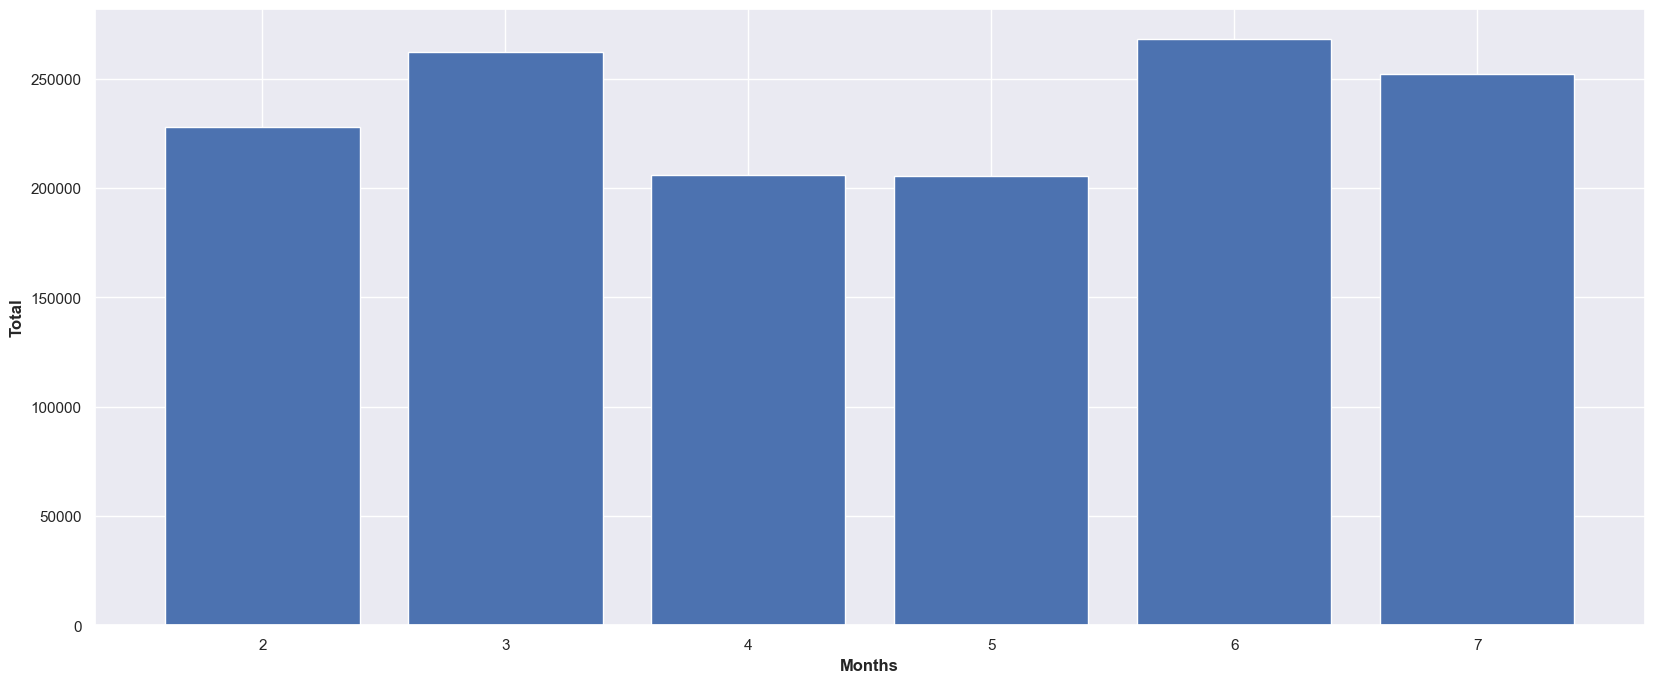

In [61]:
#plotting monthly total graph
plt.figure(figsize = (20,8))
plt.bar( x = monthly_total.index,
        height = monthly_total.values)
plt.ylabel('Total',fontsize= 12, weight= 'bold')
plt.xlabel('Months',fontsize= 12, weight= 'bold')
plt.show()

In [62]:
monthly_reviews = Amazon_devices.groupby('month')['n_reviews'].sum().sort_values(ascending=False)
monthly_reviews

month
5    308607286
4    298166688
6    248079686
7    233084890
3    161514034
2    137357651
Name: n_reviews, dtype: int64

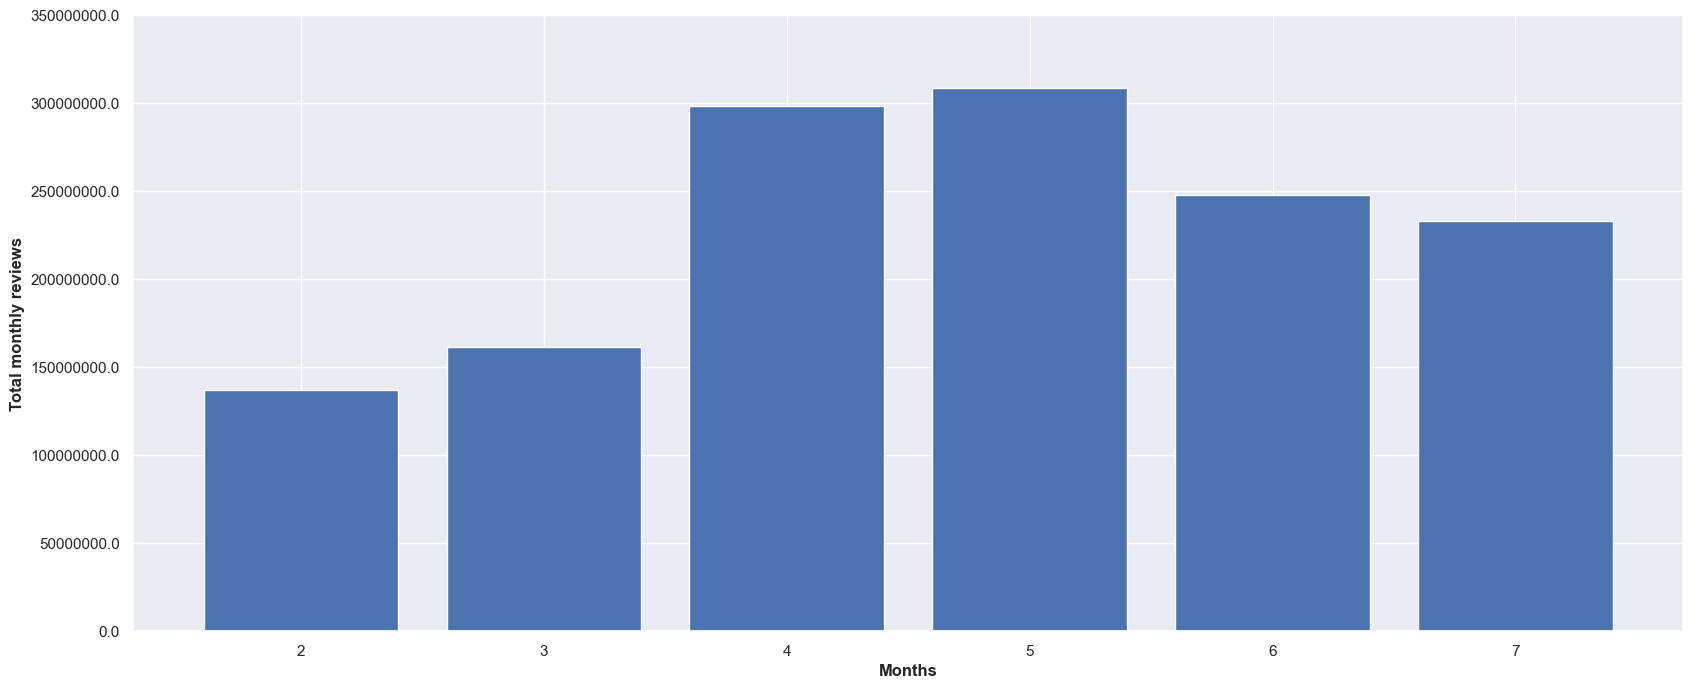

In [64]:
#plotting total monthly reviews
plt.figure(figsize = (20,8))
plt.bar( x = monthly_reviews.index,
        height = monthly_reviews.values)
plt.yticks(ticks = plt.yticks()[0],
           labels = plt.yticks()[0])
plt.ylabel('Total monthly reviews',fontsize= 12, weight= 'bold')
plt.xlabel('Months', fontsize= 12, weight= 'bold')
plt.show()

In [28]:
Amazon_devices[Amazon_devices['month'] == 5].sort_values('n_reviews',ascending = False)

,date,number,name,rating,n_reviews,price,month
10761,2021-05-19,62,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1136023,35.19,5
10764,2021-05-19,65,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1136023,35.19,5
10706,2021-05-19,7,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1136023,35.19,5
10683,2021-05-18,84,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1135632,29.99,5
10669,2021-05-18,70,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1135632,29.99,5
...,...,...,...,...,...,...,...
10883,2021-05-20,84,2021 Apple TV 4K (32GB),0.0,0,179.00,5
10708,2021-05-19,9,"Binoculars 12x25, HD Professional/Waterproof B...",0.0,0,0.00,5
11005,2021-05-22,6,Wyze Cam v3 1080p HD Indoor/Outdoor Video Came...,0.0,0,0.00,5
9849,2021-05-10,50,Acer R240HY bidx 23.8-Inch IPS HDMI DVI VGA (1...,0.0,0,129.00,5


<u> REMEMBER TO CHECK DUPLICATE VALUES </u>

In [29]:
Amazon_devices[10761:]

,date,number,name,rating,n_reviews,price,month
10761,2021-05-19,62,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1136023,35.19,5
10762,2021-05-19,63,All-new Echo Dot (4th Gen) | Smart speaker wit...,4.7,247333,34.43,5
10763,2021-05-19,64,New Apple AirTag 4 Pack,4.6,400,99.00,5
10764,2021-05-19,65,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4.7,1136023,35.19,5
10765,2021-05-19,66,TR Industrial Multi-Purpose UV Resistant Black...,4.7,15562,7.47,5
...,...,...,...,...,...,...,...
18095,2021-07-31,96,Tile Slim (2020) 1-pack - Slim & Sleek Bluetoo...,4.6,25512,28.73,7
18096,2021-07-31,97,"Blink Outdoor - wireless, weather-resistant HD...",4.4,60859,99.99,7
18097,2021-07-31,98,EVISTR 16GB Digital Voice Recorder Voice Activ...,4.4,12196,39.99,7
18098,2021-07-31,99,"Echo (4th Gen) | With premium sound, smart hom...",4.7,71566,69.99,7


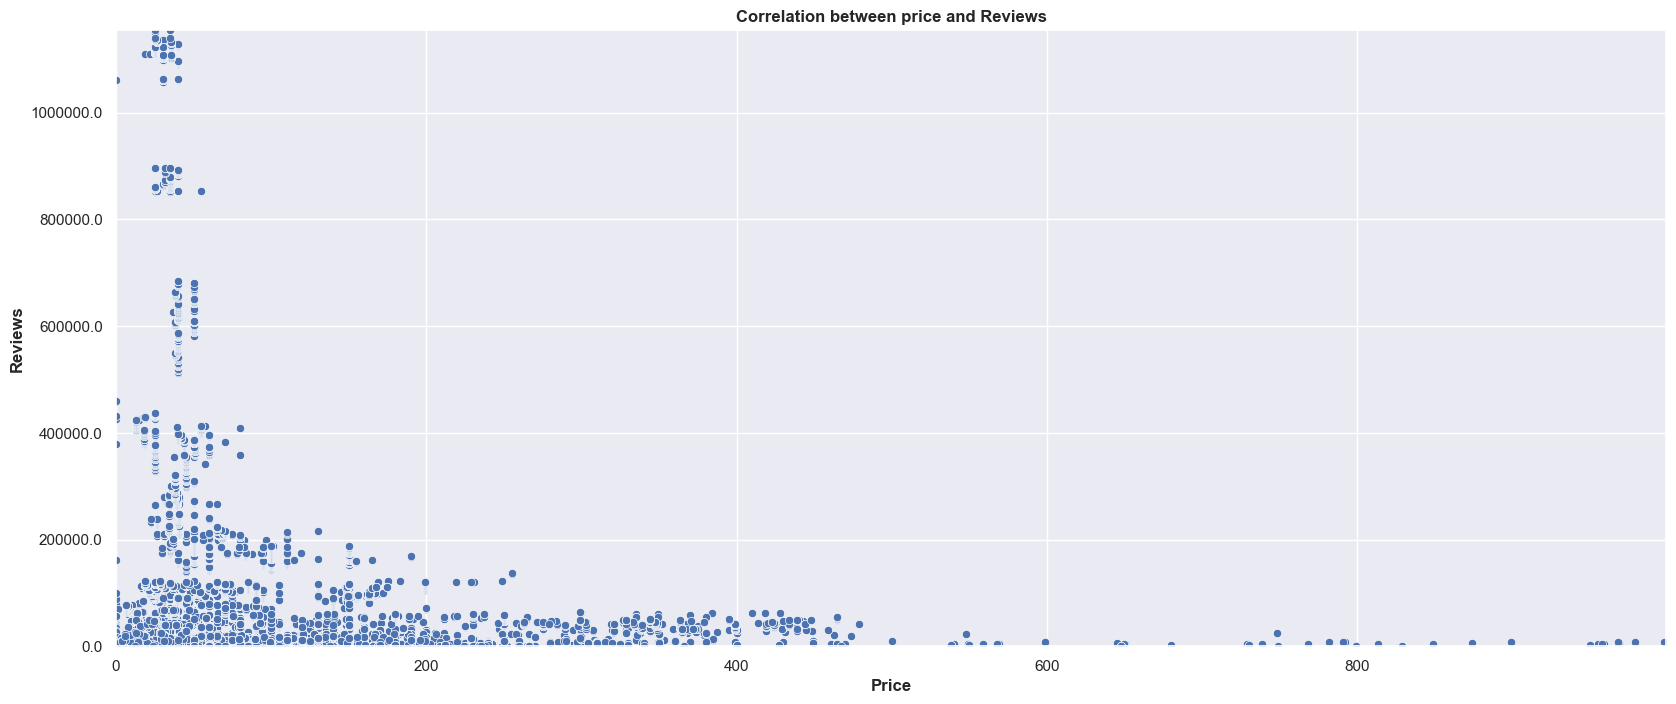

In [30]:
plt.figure(figsize = (20,8))
sns.scatterplot(x='price', y='n_reviews', data = Amazon_devices,)
plt.xlabel('Price', weight = 'bold')
plt.ylabel('Reviews', weight = 'bold')
plt.yticks(ticks= plt.yticks()[0], labels=plt.yticks()[0])
plt.xlim(0,Amazon_devices['price'].max())
plt.ylim(0,Amazon_devices['n_reviews'].max())
plt.title('Correlation between price and Reviews', fontsize = 12, weight = 'bold')
plt.show()

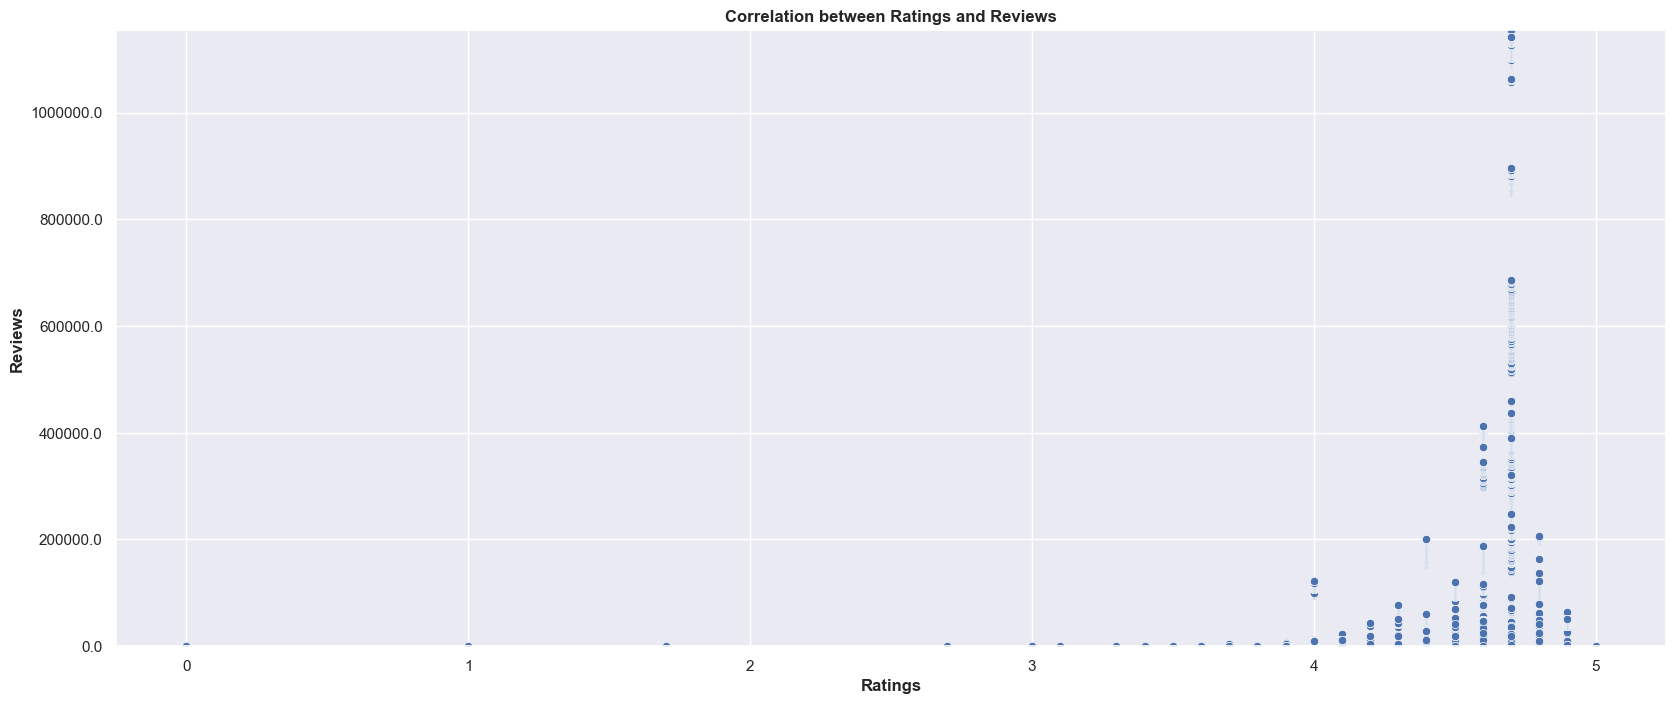

In [31]:
plt.figure(figsize = (20,8))
sns.scatterplot(x='rating', y='n_reviews', data = Amazon_devices)
plt.xlabel('Ratings', weight = 'bold')
plt.ylabel('Reviews', weight = 'bold')
plt.yticks(ticks= plt.yticks()[0], labels=plt.yticks()[0])
plt.ylim(0,Amazon_devices['n_reviews'].max())
plt.title('Correlation between Ratings and Reviews', fontsize =12, weight = 'bold')
plt.show()

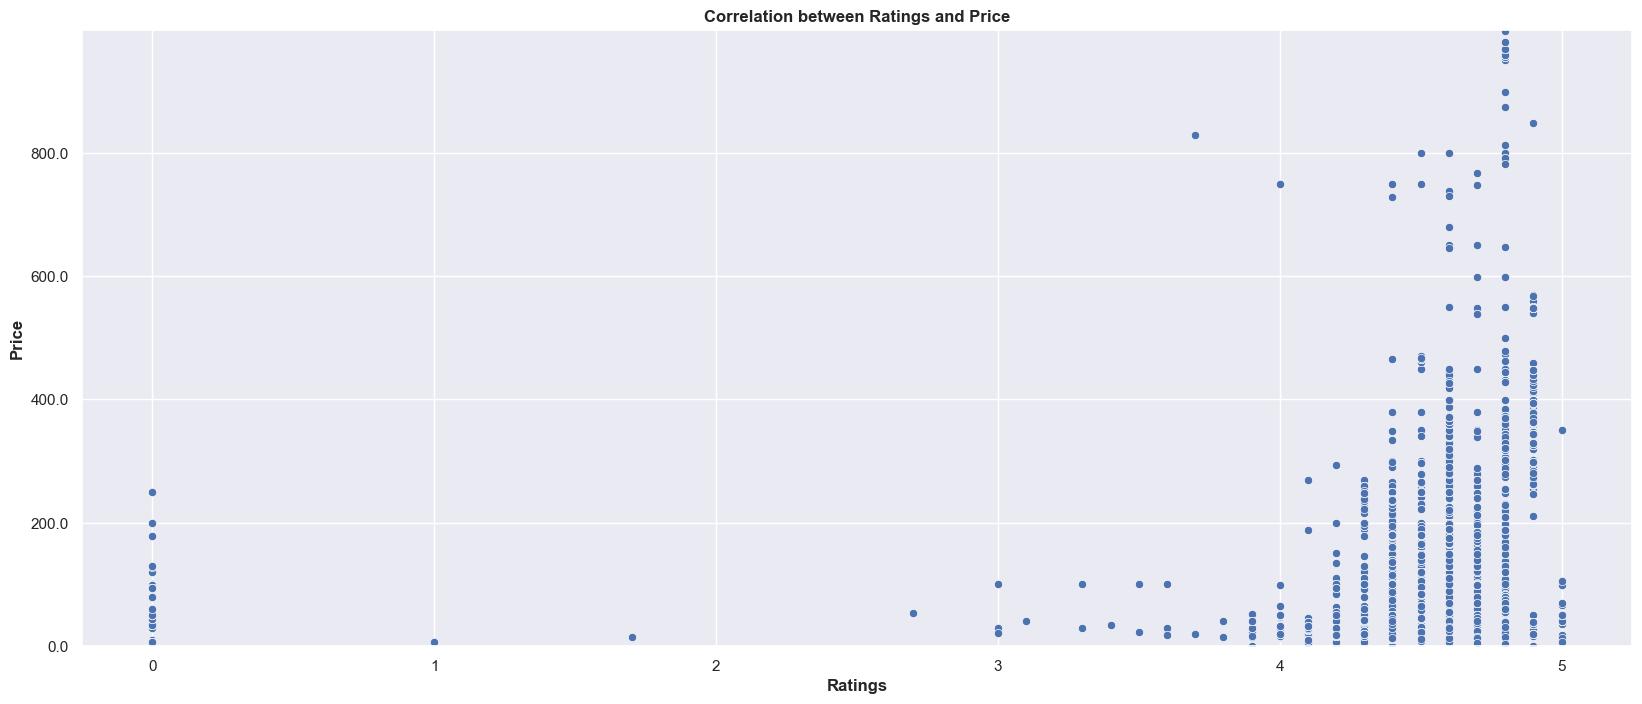

In [32]:
plt.figure(figsize = (20,8))
sns.scatterplot(x='rating', y='price', data = Amazon_devices)
plt.xlabel('Ratings', weight = 'bold')
plt.ylabel('Price', weight = 'bold')
plt.yticks(ticks= plt.yticks()[0], labels=plt.yticks()[0])
plt.title('Correlation between Ratings and Price', fontsize = 12, weight = 'bold')
plt.ylim(0,Amazon_devices['price'].max())
plt.show() 

In [33]:
correlation = Amazon_devices['n_reviews'].corr(Amazon_devices['rating'])
print("Correlation between number of reviews and ratings:", correlation)

Correlation between number of reviews and ratings: 0.06739304763469903


In [34]:
Amazon_devices.corr() 

,number,rating,n_reviews,price,month
number,1.000000e+00,-0.018727,-0.304020,0.083421,3.409447e-15
rating,-1.872682e-02,1.000000,0.067393,0.056224,-4.885546e-02
n_reviews,-3.040196e-01,0.067393,1.000000,-0.096260,6.428651e-02
price,8.342119e-02,0.056224,-0.096260,1.000000,5.887885e-03
month,3.409447e-15,-0.048855,0.064287,0.005888,1.000000e+00


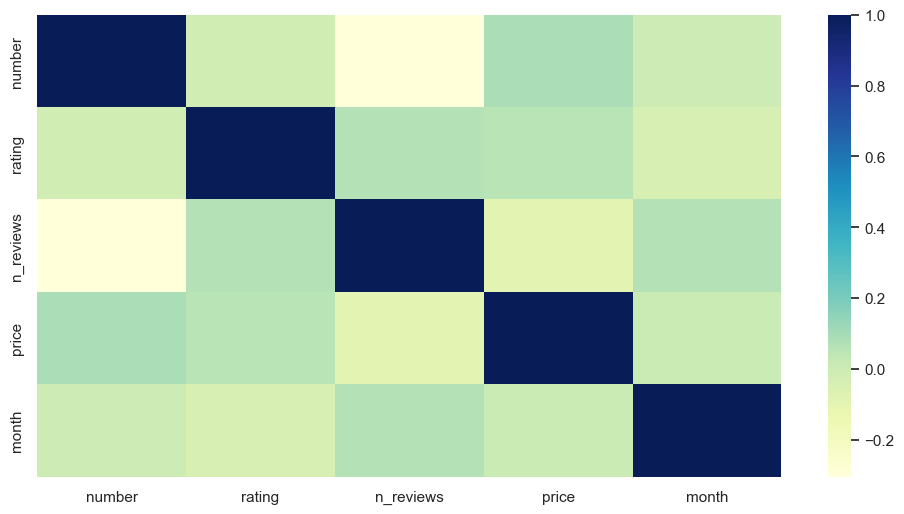

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(Amazon_devices.corr(), cmap="YlGnBu")
plt.show()